In [63]:
import tensorflow as tf
import pandas as pd

import array 
import sklearn
from sklearn.metrics import confusion_matrix
import pylab as pl
import matplotlib.pyplot as plt

FilePath = "/home/nramvinojen/Programs/Workbench/24Jan2019/"
ext = ".jpg"

#RunFolder = "28Jan2019"
#FV_count = 2048
#WithNeg = "No" # "No" or  "Yes"

In [ ]:
print("FV len :" + str(FV_count))
print("Folder :" + RunFolder )
print("WithNeg :" + WithNeg)

In [64]:
# If GPU is available: 
config = tf.ConfigProto()
config.log_device_placement = True
config.allow_soft_placement = True
config.gpu_options.allocator_type = 'BFC'

# Limit the maximum memory used
config.gpu_options.per_process_gpu_memory_fraction = 0.1

# set session config
tf.keras.backend.set_session(tf.Session(config=config))

In [65]:
# load json and create model
from keras.models import model_from_json
json_file = open(FilePath + "Dataset/ModelAndWeights/" + 'Classifier_DNN_Resnet2048FV_8Class.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(FilePath + "Dataset/ModelAndWeights/" + "Classifier_DNN_Resnet2048FV_8Class.h5")
print("Loaded model from disk")

Loaded model from disk


In [66]:
# load dataset

if WithNeg == "Yes" :
    dataframe = pd.read_csv(FilePath + "Runs/" + RunFolder + "/RegressionOut/WithNeg/" + "Target_test_FV2048_Classifer.csv", header=None)
else :
    dataframe = pd.read_csv(FilePath + "Runs/" + RunFolder + "/RegressionOut/NegRemoved/" + "Target_test_FV2048_Classifer.csv", header=None)


X_test = dataframe.values.astype(float)



In [67]:
predictions = loaded_model.predict(X_ans)

In [68]:
print("Predicted Labels")
y_pred = [0] * len(Y_ans)
for i in range (len(Y_ans)):
    a=list(predictions[i])
    y_pred[i]= a.index(max(a))
    print(a.index(max(a)),end=" ")

Predicted Labels
0 6 2 0 6 6 1 0 4 0 7 0 1 1 0 1 1 1 7 3 5 5 6 5 2 7 7 7 3 4 4 4 3 2 7 3 6 5 5 2 7 3 6 5 7 7 5 6 5 0 5 6 7 1 6 6 1 6 2 6 6 6 4 7 4 6 7 7 7 1 2 7 

In [69]:
print("Actual Labels")
for i in range (len(Y_ans)):
    print(int(Y_ans[i]),end=" ")

Actual Labels
0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 

In [70]:
Y_test = Y_ans
cm = confusion_matrix(Y_ans, y_pred)
print("")
print(cm)


[[3 1 1 0 1 0 3 0]
 [3 5 0 0 0 0 0 1]
 [0 0 1 1 0 3 1 3]
 [0 0 1 3 3 0 0 2]
 [0 0 1 1 0 3 2 2]
 [1 1 0 0 0 3 2 2]
 [0 1 1 0 1 0 6 0]
 [0 1 1 0 1 0 1 5]]


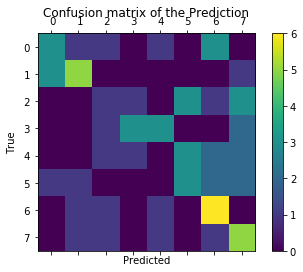

In [71]:
labels = [' 0', ' 1', ' 2', ' 3', ' 4', ' 5',' 6', ' 7']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the Prediction')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels( [''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
target = ['0','1','2','3','4','5','6','7']

In [59]:
print ('\n Summary for each class:')
print (sklearn.metrics.classification_report(Y_ans, y_pred, target_names=target))


 Summary of the precision, recall, F1 score for each class:
             precision    recall  f1-score   support

        0.0       0.43      0.33      0.38         9
        1.0       0.56      0.56      0.56         9
        2.0       0.17      0.11      0.13         9
        3.0       0.60      0.33      0.43         9
        4.0       0.00      0.00      0.00         9
        5.0       0.33      0.33      0.33         9
        6.0       0.40      0.67      0.50         9
        7.0       0.33      0.56      0.42         9

avg / total       0.35      0.36      0.34        72

